In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/training_data_abs.csv', sep='\t')

In [ ]:
data

,Judgment_ID,Judgment,Summary,len
5414,5493,Special Leave Petition No. 1900 of 1981 etc. F...,% In exercise of the powers conferred by Secti...,593
6086,6175,ecial Leave Petition (C) No. 5628 of 1988. Fro...,Applying the principle enunciated in Atma Ram ...,1063
4754,4822,r Petition (Civil) No. 344 of 1983. Under arti...,A petition for withdrawing a writ petition pen...,1102
5065,5137,Special Leave Petition (Civil) No. 11638 of 19...,In a petition for special leave against an int...,1244
5082,5156,: Criminal Appeal Nos. 563 64 of 1986 From the...,"HELD: 1. The fact that the offences, if any, a...",1274
...,...,...,...,...
2158,2189,: Writ Petition No. 153 of 1966. (Under Articl...,The validity of the Punjab Security of Land Te...,465169
4590,4656,N: Criminal Appeal No. 273 of 1979. Appeal by ...,Upholding the constitutionality of section 302...,480155
66,67,eference No. 1 of 1951. The circumstances whic...,"Section 7 of the , provided that The Provincia...",491396
33,34,No. XIII of 1950. Application under article 32...,The petitioner who was detained under the Prev...,516385


In [ ]:
def preprocess_text(text):
    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]

    # Remove stopwords and perform stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    processed_words = []
    for sentence in words:
        processed_sentence = [stemmer.stem(word.lower()) for word in sentence if word.lower() not in stop_words]
        processed_words.append(' '.join(processed_sentence))

    return processed_words

In [ ]:
def calculate_similarity_matrix(sentences):
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the preprocessed sentences
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # Calculate the cosine similarity matrix
    similarity_matrix = np.dot(tfidf_matrix, tfidf_matrix.T)

    return similarity_matrix


In [ ]:
def extractive_summarization(text, num_sentences):
    # Preprocess the text
    processed_sentences = preprocess_text(text)

    # Calculate similarity matrix
    similarity_matrix = calculate_similarity_matrix(processed_sentences)

    # Calculating sum of similarity matrix
    scores = similarity_matrix.sum(axis=1)

    # Rank sentences based on scores
    ranked_sentences = sorted(((score, idx) for idx, score in enumerate(scores)), reverse=True)

    # Select the top N sentences as the summary
    sentences = sent_tokenize(text)
    summary_sentences = [sentences[idx] for _, idx in ranked_sentences[:num_sentences]]
    summary = ' '.join(summary_sentences)

    return summary

In [ ]:
# Example usage

judgment = data.iloc[1][1]

actual_summary = data.iloc[1][2]
summary = extractive_summarization(judgment, 5)
print("Actual summary:\n")
print(actual_summary)
print("\n\nGenerated summary:\n")
print(summary)

Actual summary:

Section 7 (1) (c) of the East Punjab Public Safety Act, 1949, as extended to the Province of Delhi provided that the Provincial Government or any authority authorised by it in this behalf, if satisfied that such action is necessary for preventing or combating any activity prejudicial to the public safety or the maintenance of public order may, by order in writing addressed to a a printer, publisher or editor require that any matter relating to a 606 particular subject or class of subjects shall before publi cation be submitted for scrutiny.  Held per KANIA C. J., PATANJALI SASTRI, MEHR CHAND MAHAJAN, MUKHERJEA and DAS JJ. (FAZL ALI J. dissenting) that inasmuch as section 7 (1) (c) authorised the imposition of restrictions on the fundamental right of freedom of speech and expression guaranteed by article 19 (1.) (a) of the Consti tution for the purpose of preventing activities prejudicial to public safety and maintenance of public order, it was not a law relating to a m

In [ ]:
print(judgment)

XXIX of 1950. Application under article 32 of the Constitution of India for a writ of certiorari and prohibition. The facts are stated in the judgment. N.C. Chatterjee (B. Banerji, with him) for the petition er. M.C. Setalvad, Attorney General for India, (section M. Sikri, with him) for the respondent. May 26. The judgment of Kania C.J., Patanjali Sastri, Mehr Chand Mahajan, Mukherjea and Das JJ. was deliv ered by Patanjali Sastri J. Fazl Ali J. delivered a separate dissenting judgment, 607 PATANJALI SASTRI J. This is an application under arti cle 32 of the Constitution praying for the issue of writs of certiorari and prohibition to the respondent, the Chief Commissioner of Delhi, with a view to examine the legality of and quash the order made by him in regard to an English weekly of Delhi called the Organizer of which the first applicant is the printer and publisher, and the second is the editor. On 2nd March, 1950, the respondent, in exercise of powers conferred on him by section 7 (

In [ ]:
!pip install rouge-score
!pip install rouge


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge
from rouge_score import rouge_scorer

In [ ]:
rouge = Rouge()

scores = rouge.get_scores(summary_model, actual_summary)
print(scores)

[{'rouge-1': {'r': 0.43548387096774194, 'p': 0.38028169014084506, 'f': 0.4060150326168806}, 'rouge-2': {'r': 0.15942028985507245, 'p': 0.13253012048192772, 'f': 0.1447368371476802}, 'rouge-l': {'r': 0.41935483870967744, 'p': 0.36619718309859156, 'f': 0.3909774386319182}}]


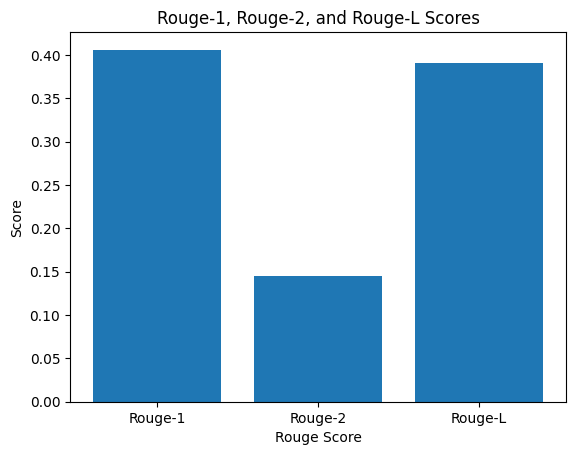

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'scores' is a list of dictionaries containing Rouge scores
# Extracting the Rouge-1, Rouge-2, and Rouge-L scores
rouge_1_score = scores[0]['rouge-1']['f']
rouge_2_score = scores[0]['rouge-2']['f']
rouge_l_score = scores[0]['rouge-l']['f']

# Creating a bar plot for the Rouge scores
plt.bar(['Rouge-1', 'Rouge-2', 'Rouge-L'], [rouge_1_score, rouge_2_score, rouge_l_score])

# Adding labels and title to the plot
plt.xlabel('Rouge Score')
plt.ylabel('Score')
plt.title('Rouge-1, Rouge-2, and Rouge-L Scores')

# Displaying the plot
plt.show()
